In [1]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)

In [2]:
clf.predict([[2., 2.]])

array([1])

In [3]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

10
DecisionTreeClassifier(max_features='sqrt', random_state=812284260)


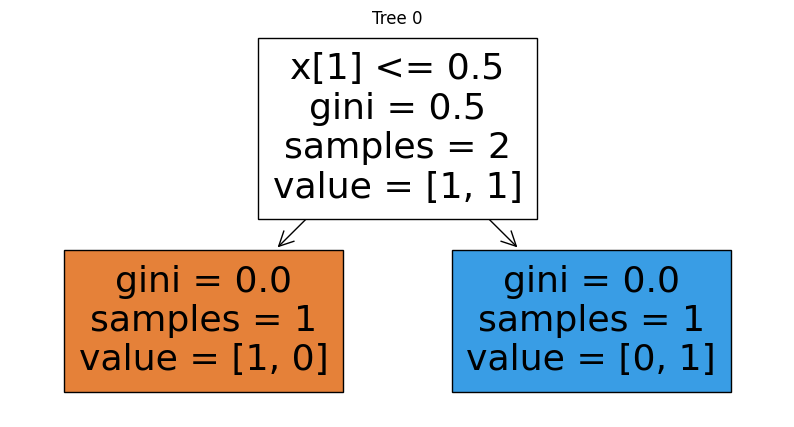

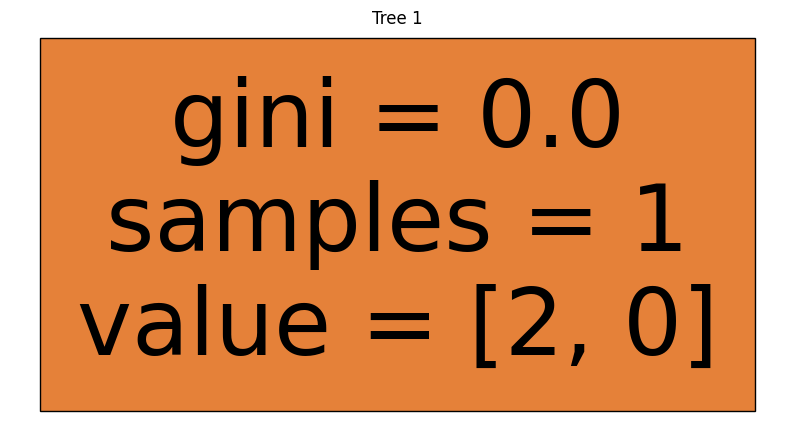

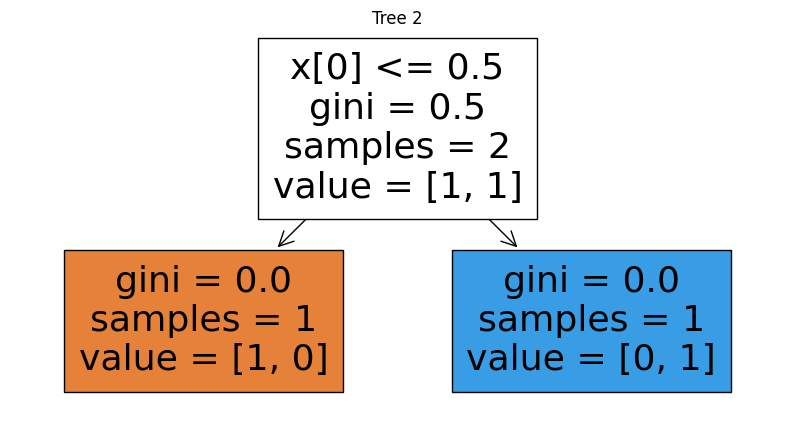

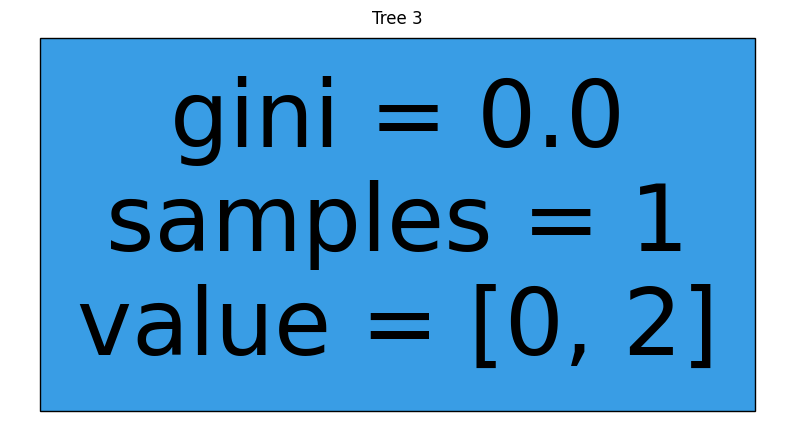

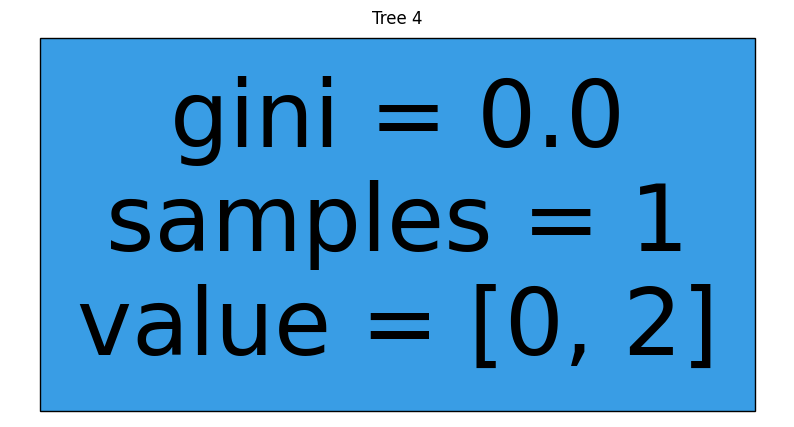

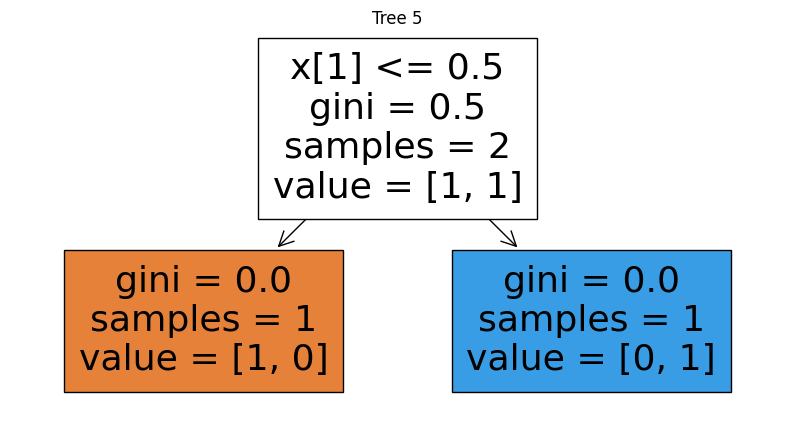

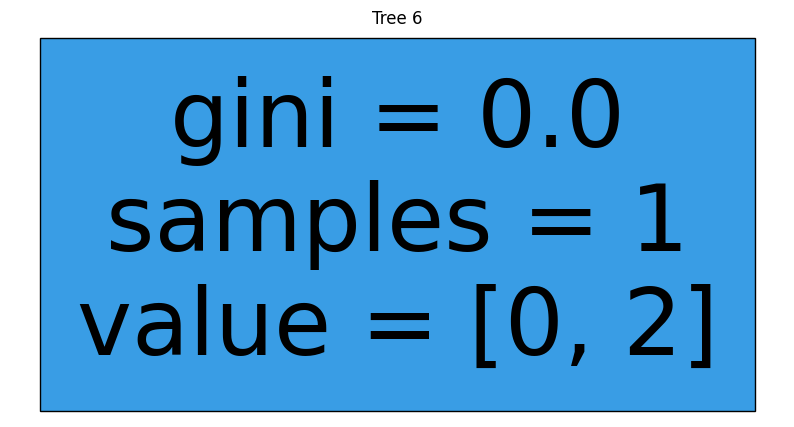

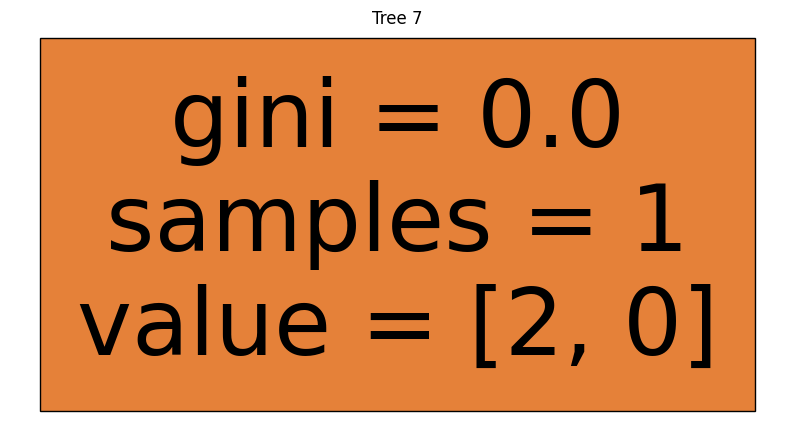

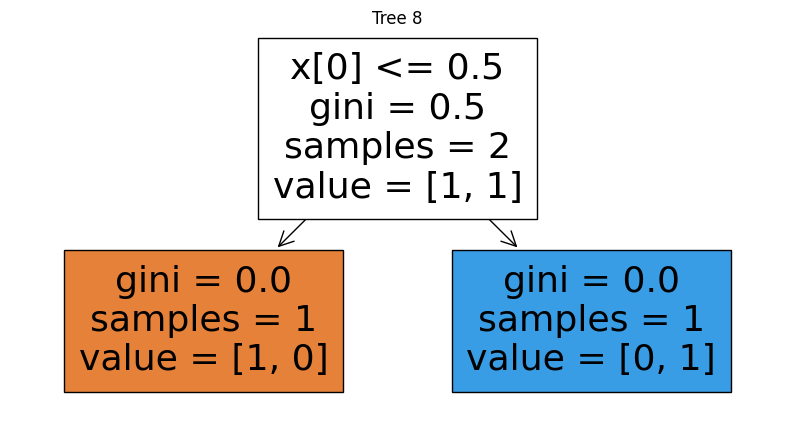

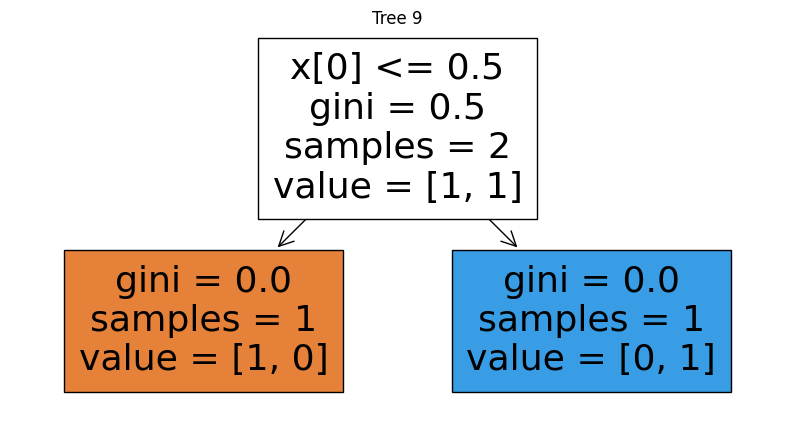

In [4]:
estimators = clf.estimators_
print(len(estimators))  # Number of trees
print(estimators[0])  # First tree

from sklearn.tree import plot_tree

# Plot the first few trees
for tree_idx, tree in enumerate(estimators):  # Only looking at the first class
    fig, ax = plt.subplots(figsize=(10, 5))
    plot_tree(tree, ax=ax, filled=True)
    plt.title(f'Tree {tree_idx}')
    plt.show()

In [5]:
from sklearn.tree import _tree
import numpy as np

In [6]:
def recurse(tree_, feature_names, node, depth):
    indent = "    " * (depth+3)
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        name = feature_names[tree_.feature[node]]
        threshold = tree_.threshold[node]

        if depth == 1:
            print("{} Provable.if({}.lessThan(Field({})), ".format(indent, name, int(np.round(threshold * 100,0))))
        else:
            print("{}Provable.if({}.lessThan(Field({})), ".format(indent, name, int(np.round(threshold * 100,0))))
        recurse(tree_, feature_names, tree_.children_left[node], depth + 1)
        print("{}, ".format(indent))
        recurse(tree_, feature_names, tree_.children_right[node], depth + 1)
        if depth == 1:
            print("{})".format(indent))
        else:
            print("{})".format(indent))
    else:
        print("{}Field({})".format(indent, np.argmax(tree_.value[node][0])))

In [15]:
def rf_to_o1js(clf, tree, feature_names):
    # feature_name = [
    #     feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
    #     for i in tree_.feature
    # ]
    # feature_names = [f.replace(" ", "_")[:-5] for f in feature_names]
    estimators = clf.estimators_
    possible_classes = clf.classes_


    print("const RandomForest = ZkProgram({")
    print("    name: 'RandomForest',")
    print("    publicOutput: Field,")
    print("methods: {")
    print("    predict: {")
    print("        privateInputs: [{}],".format(", ".join(["Field"] * len(feature_names))))
    print("        method({}): Field {{".format(", ".join(feature_names)))
    print(f"            let arr = new Provable.Array(Field, {len(possible_classes)});")
    print("            let index = 0;")


    for tree_idx, tree in enumerate(estimators):  # Only looking at the first class
        tree_ = tree.tree_
        feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]
        print("            index = ")
        recurse(tree_, feature_name, 0, 1)
        print("            );")
        print("            arr[index]=arr[index]+1;")
    print("            return argMax(arr);")
    print("        },")
    print("    },")
    print("},")
    print("});")

In [16]:
rf_to_o1js(clf, tree, ["feature1", "feature2"])

const RandomForest = ZkProgram({
    name: 'RandomForest',
    publicOutput: Field,
methods: {
    predict: {
        privateInputs: [Field, Field],
        method(feature1, feature2): Field {
            let arr = new Provable.Array(Field, 2);
            let index = 0;
            index = 
                 Provable.if(undefined!.lessThan(Field(50)), 
                    Field(0)
                , 
                    Field(1)
                )
            );
            arr[index]=arr[index]+1;
            index = 
                Field(0)
            );
            arr[index]=arr[index]+1;
            index = 
                 Provable.if(feature1.lessThan(Field(50)), 
                    Field(0)
                , 
                    Field(1)
                )
            );
            arr[index]=arr[index]+1;
            index = 
                Field(1)
            );
            arr[index]=arr[index]+1;
            index = 
                Field(1)
            );
            a

In [9]:
possible_classes = clf.classes_

print(possible_classes)

[0 1]
